University of Stirling<br>
Computing Science and Mathematics<br>
#### CSCU9YE - Artificial Intelligence<p>   
## Assignment: Organising a Colour Palette 

Group 4: 2615649, 2622287, 2613922

### Reading the data file 

In [16]:
import numpy as np      # Numerical library, used keeing the list of colours and computing the Euclidean distance

# Read in the color data file 
# Input: string with file name
# Oputput: the number of colours (integer), and a list numpy arrays with all the colours
def read_data(fname):
    cols = np.loadtxt(fname, skiprows = 4) # The first 4 lines have text information, and are ignored     
    ncols = len(cols)     # Total number of colours and list of colours
    return ncols,cols

In [17]:
ncolors, colors = read_data("col500.txt")

print(f'Number of colours: {ncolors}')
print("First 5 colours:")
print(colors[0:5,  :])

Number of colours: 496
First 5 colours:
[[0.96645354 0.4407326  0.00749147]
 [0.91097596 0.939269   0.58222757]
 [0.67156348 0.08393823 0.76648093]
 [0.23680978 0.03081402 0.78877272]
 [0.34608897 0.62328148 0.6158157 ]]


### Plotting a sequence of colours

The function <b>plot_colors()</b> displaysthe colours from the color list *col_list* the order given by the *col_order* list. 

*col_list* and *col_order* need to be of the same length. The *ratio* parameter indicates height/width proportion of each bar of colour in the plot.

In [18]:
import matplotlib.pyplot as plt

# Dsiplay the colors as a strip of color bars
# Input: list of colors, order of colors, and height/ratio

def plot_colors(col_list, col_order, ratio = 10): 
    assert len(col_list) == len(col_order)
    img = np.zeros((ratio, len(col_list), 3))
    for i in range(0, len(col_list)):
        img[:, i, :] = col_list[col_order[i]]
    fig, axes = plt.subplots(1, figsize=(10,6)) # figsize=(width,height) handles window dimensions
    axes.imshow(img, interpolation='nearest')
    axes.axis('off')
    plt.show()

### Examples of ploting a colour ordering

Let us see how to call the plot function, using the original order in which the colours appear in the data file, and another randomised order.

Same ordering of colurs with a larger ratio


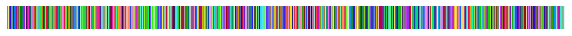

In [19]:
import random as rnd

# Plot all the colors in the order they are listd in the file
order1 = list(range(ncolors))   # list of consequtive numbers from 0 to ncolors
plot_colors(colors, order1)    #  You will notice that colors are not ordered in the file

# Function to generate a random solution (random ordering)  - we can generate a random ordering of the list by using
# the shuffle function from the random library
def random_sol(ncolors):
    sol = list(range(ncolors))  # list of consecutive numbers from 0 to ncolors
    # Shuffle the elements in the list randomly. Shuffles in place and does not return a value
    rnd.shuffle(sol)
    return sol

# You can test different ratios of the hight/width of the lines in the plot
print("Same ordering of colurs with a larger ratio")
plot_colors(colors, order1, 20)

### Evaluation function to determine the quality of a given ordering of colours

When solving the problem using optimisation heuristics, we need an evaluation function to measure the quality of a sulution. The problem is formulated as a minimisation  problem. We want to minimise the pair-wise distance between consequtive colours in the ordering. 

This function computes the quality of given ordering of colours. The smaller the evaluation function the better, as this is is formulated as a minimisation problem

In [20]:
# This is an auxiliary function. It calculate the Euclidean distance between two individual colours
# Input: v and u as to be numpy arrays, vectors of real numbers with the RGB coordinates.

def euclid(v, u):
    return np.linalg.norm(v - u)

# Evaluation function.  Measures the quality of a given solution (ordering of colours) 
# The function computes the sum of the distances between all consecutive colours in the ordering
# Input: cols: list of colours 
#        ordc: ordering of colours
# Output: real number with the sumf of pair-wise differences in the colour ordering

def evaluate(cols, ordc):     
    adjacentColPairs = [[cols[ordc[i]],cols[ordc[i-1]]] for i in range(1,len(ordc))]
    return sum([euclid(i[1], i[0]) for i in adjacentColPairs])

## Solution implementation

We implemented all three mutation methods with the ability to select the desired one by passing in the name to the hc algorithm. We tested the methods and number of iterations using a evaluate_best_method function. 

#### Swap implementation

The first mutation operator we implementated is the random_swap method. This swaps two random positions in the array and returns this swapped array.

In [21]:
# random swap function. swaps two random positions in the given solution array (ordering of colours)
# input: solution: solution, ordering of colours
# output: swap_solution, ordering of colours with two random positions swapped
def random_swap(solution):
    # take copy of the solution passed in
    swap_solution = solution[:]

    # generate two random positions in the array
    ran_position1 = rnd.randint(0, len(swap_solution) - 1)
    ran_position2 = rnd.randint(0, len(swap_solution) - 1)

    # If random positions are the same then change ran_position2
    while ran_position1 == ran_position2:
        ran_position2 = rnd.randint(0, len(swap_solution) - 1)

    # store positions being swapped in temp variables
    swap_val1 = swap_solution[ran_position1]
    swap_val2 = swap_solution[ran_position2]

    # complete swap by swapping values at the random positions
    swap_solution[ran_position1] = swap_val2
    swap_solution[ran_position2] = swap_val1

    return swap_solution  # return the random swap solution

#### Inversion implementation

The second mutation operator we implemented is the random_inverse method. This reverses the ordering between two randomly selected points and returns the partially inversed array. 

In [22]:
# inverse function, inverts values between two positions in given array of colour order
# input: solution, ordering of colours
# output: inverse_solution, inverted values between two points in array
def random_inverse(solution):
    # take copy of the solution passed in
    inverse_solution = solution[:]

    # generate two random positions in the array
    ran_position1 = rnd.randint(0, len(inverse_solution) - 1)
    ran_position2 = rnd.randint(0, len(inverse_solution) - 1)

    # If random positions are the same then change ran_position2
    while ran_position1 == ran_position2:
        ran_position2 = rnd.randint(0, len(inverse_solution) - 1)

    # Order the random positions so ran_position1 is smaller than ran_position2
    if ran_position1 > ran_position2:
        placeholder = ran_position1
        ran_position1 = ran_position2
        ran_position2 = placeholder

    # Take the section that we want to inverse
    inverse_selection = inverse_solution[ran_position1:ran_position2]
    # Reverse all the indexes in the section we want to inverse
    inverse_selection.reverse()

    # Put solution back together
    # Get the original section at the start of the solution
    section_before_rnd1 = inverse_solution[0:ran_position1]
    # Get the section at the end of the solution
    section_after_rnd2 = inverse_solution[ran_position2:len(inverse_solution)]
    # Add the start section to the solution
    inverse_solution = section_before_rnd1
    # Add the reversed section to the solution
    inverse_solution.extend(inverse_selection)
    # Finally add the end section to the solution
    inverse_solution.extend(section_after_rnd2)

    return inverse_solution

#### Scramble implementation

The third mutation operator we implemented is the random_scramble method. This randomly scrambles the ordering between two randomly selected points and returns the partially scrambled array. 

In [23]:
# scramble function, randomly rearranges values between two random points in given array
# input: solution, array ordering of colours
# output: scramble_solution, array with scrambled values between two points
def random_scramble(solution):
    # take copy of the solution passed in
    scramble_solution = solution[:]

    # generate two random positions in the array
    ran_position1 = rnd.randint(0, len(scramble_solution) - 1)
    ran_position2 = rnd.randint(0, len(scramble_solution) - 1)

    # while/if random positions are the same then change ran_position2
    while ran_position1 == ran_position2:
        ran_position2 = rnd.randint(0, len(scramble_solution) - 1)

    # Order the random positions so ran_position1 is smaller than ran_position2
    if ran_position1 > ran_position2:
        placeholder = ran_position1
        ran_position1 = ran_position2
        ran_position2 = placeholder
    
    scramble_section = scramble_solution[ran_position1:ran_position2]# Take the section that we want to scramble
    rnd.shuffle(scramble_section)# Shuffle all the indexes in the section we want to scramble

    # Put solution back together
    section_before_rnd1 = scramble_solution[0:ran_position1] # Get the unscrambled section at the start of the solution
    section_after_rnd2 = scramble_solution[ran_position2:len(scramble_solution)]# Get the unscrambled section at the end of the solution
    
    scramble_solution = section_before_rnd1# Add the start section to the solution
    scramble_solution.extend(scramble_section)# Add the scrambled section to the solution
    scramble_solution.extend(section_after_rnd2)# Finally add the end section to the solution

    return scramble_solution

### Hill climbing implementation

The hill climbing algorithm generates a random solution and on that solution applies the selected mutation operator for the specified number of hc_iterations. If an improvement is made for the evaluation value then the ordering and value will be stored as the new best. Each time an improvement is made, the value is added to the trace array so we can plot this later. This plot is where the name 'hill climbing' comes from because as the algorithm finds better solutions and plots the evaluation, this should produce a hill in the plot. 

In [24]:
# hill_climbing function. generates random solution, performs a random swap of two elements in that solution...
# ...compares the evaluation of both solutions and stores the best with the lowest evaluation
# Input: hc_iterations (the number of iterations to run the random swap check) and permutation method e.g. 'swap', 'inversion', 'scramble'
# Output: best_solution, the best solution during hill climbing process
#         improvement_trace, storing the distance at every point an improvement has been made
def hill_climbing(hc_iterations, method_choice, cols):
    hc_improvement_trace = []  # stores distance improvements
    # generate a random solution using random_sol
    hc_best_solution = random_sol(len(cols))

    if method_choice == "swap": # if method choice is swap
        for i in range(hc_iterations): # for hc iterations do
            best_solution_eval = evaluate(cols, hc_best_solution) # evaluate best_solution
            ran_swap_solution = random_swap(hc_best_solution) # perform a swap mutation
            ran_swap_solution_eval = evaluate(cols, ran_swap_solution) # re evaluate the swapped solution

            if ran_swap_solution_eval < best_solution_eval: # if the swapped solytion is better
                hc_best_solution = ran_swap_solution[:] # store this as the best
                hc_improvement_trace.append(ran_swap_solution_eval) # add the evaluation to the trace

    elif method_choice == "inversion": # if method choice is inversion
        for i in range(hc_iterations): # same as above for inversion
            best_solution_eval = evaluate(cols, hc_best_solution)
            ran_inverse_solution = random_inverse(hc_best_solution)
            ran_inverse_solution_eval = evaluate(cols, ran_inverse_solution)

            if ran_inverse_solution_eval < best_solution_eval:
                hc_best_solution = ran_inverse_solution[:]
                hc_improvement_trace.append(ran_inverse_solution_eval)

    elif method_choice == "scramble": # if method choice is scramble
        for i in range(hc_iterations): # as as above for scramble
            best_solution_eval = evaluate(cols, hc_best_solution)
            ran_scramble_solution = random_scramble(hc_best_solution)
            ran_scramble_solution_eval = evaluate(cols, ran_scramble_solution)

            if ran_scramble_solution_eval < best_solution_eval:
                hc_best_solution = ran_scramble_solution[:]
                hc_improvement_trace.append(ran_scramble_solution_eval)
    else: # if none of these were entere give error message
        print("invalid algorithm")
    return hc_best_solution, hc_improvement_trace

### Multi Hill climbing implementation

Repeats the hill climbing algorithm for the desired hc iterations and mhc iterations using the method of choice. We discovered that the higher the hc iterations are the better the solution. Higher mhc iterations lead to slight improvements.

In [25]:
#multi hill climbing function. runs hill climbing for passed in iterations. 
#Inputs: mhc_iterations, the number of iterations to repeat the hill climbing method
#        hc iterations, the number of iterations to run in the hill climb method. aka the number of different colour orderes to try
#        method_choice, the mutation method being swap, inversion or scramble
#        cols, the list of colours from the selected file
#Output: mhc_best_solution, the colours ordering with the best evaluation value
def multi_hill_climbing(mhc_iterations, hc_iterations, method_choice, cols):
    mhc_best_solution_eval = 1000  # number larger than any possible distance

    for i in range(mhc_iterations):  # for mhc repetitions do...

        current_solution, hc_improve_trace = hill_climbing(hc_iterations, method_choice, cols)  # call hill climbing function for given iterations and method
        current_solution_eval = evaluate(cols, current_solution)  # evaluate the given solution

        if current_solution_eval < mhc_best_solution_eval:  # if new solution is better than the currnet best solution then
            mhc_best_solution = current_solution  # store the current solution as the best solution
            mhc_best_solution_eval = current_solution_eval  # store the current evaluation value as the best value

    return mhc_best_solution

### Evaluate best mutation operator function

This function tests each mutation method, swap, inversion and scramble at specified increments and produces a plot comparing the results. The results are discussed in further details later but in summary inversion gives the best appearance and evaluation and the more iterations the better

In [26]:
# evaluate bext method function
# tests each hill climb 'mutation operator' swap, inversion and scramble
# e.g. with iterations 5000, 10000, 15000, 20000, 25000, 30000 to find optimal number.
# produces a plot for each method and iteration combination
# inputs: cols, list of colours
#         ncols, number of colours
#         increments, increase in itertaions per cycle(larger files should use larger increments)

def evaluate_best_method(cols, ncols, increments):

    print('Generating mutation method/iteration results ', ncols, ' ...')
    test_iterations = 0 # initialise variable to store number of iterations
    swap_trace = [] # initialise a trace for each method
    inversion_trace = []
    scramble_trace = []
    best_sol_hc_swap = 0
    best_sol_hc_inversion = 0
    scramble = 0

    for i in range(6): # for 6 times do ... (6 chosen to test a reasonable range of iterations 5000-30,000 or 10,000-60,000)
        test_iterations += increments # increase number of iterations by 5000
        best_sol_hc_swap, imp_trace_swap = hill_climbing(test_iterations, "swap", cols) # run swap method
        swap_evaluation = evaluate(cols, best_sol_hc_swap) # evaluate best solution returned
        swap_trace.append(swap_evaluation) # add the evaluation value to the trace

        # same as swap method but for inversion
        best_sol_hc_inversion, imp_trace_inversion = hill_climbing(test_iterations, "inversion", cols)
        inversion_evaluation = evaluate(cols, best_sol_hc_inversion)
        inversion_trace.append(inversion_evaluation)

        # same as swap method but for scramble
        best_sol_hc_scramble, imp_trace_scramble = hill_climbing(test_iterations, "scramble", cols)
        scramble_evaluation = evaluate(cols, best_sol_hc_scramble)
        scramble_trace.append(scramble_evaluation)

    # plot trace for swap method
    plt.figure()
    plt.suptitle('HC Testing Iterations and mutation methods')
    plt.plot(swap_trace, color='red',label='Swap') # plot swap trace in red
    plt.plot(inversion_trace, color='blue',label='Inversion') # plot inversion trace in blue
    plt.plot(scramble_trace, color='green',label='Scramble') # plot scramble trace in green
    plt.ylabel("Distance Value")
    plt.xlabel("Iteration")
    plt.legend()
    plt.show()

    plot_colors(cols, best_sol_hc_swap, 20) #plot the colour ordering
    print(f'^best swap {ncols}: {evaluate(cols, best_sol_hc_swap)}')  # Display best swap inversion evaluation value
    plot_colors(cols, best_sol_hc_inversion, 20) #plot the colour ordering
    print(f'^best inversion {ncols}: {evaluate(cols, best_sol_hc_inversion)}\n')  # Display best inversion evaluation value
    plot_colors(cols, best_sol_hc_scramble, 20) #plot the colour ordering
    print(f'^best scramble solution {ncols}: {evaluate(cols, best_sol_hc_scramble)}\n')  # Displaying  best scramble evaluation value

### Evaluating the quality of given solutions and ploting orderings

Evaluating hill climbing and multi hill climbing solutions for both 100 colour and 500 colour files

For the 100 colour file using inversion, there is rapid improvement until around 10,000 iterations and slower improvements after that with little improvements being made past this point

For the 500 colour file using inversion, there is rapid improvement until around 30,000 iterations and slower steady improvements improvements after this point.

Number of colours 100: 96
First 5 colours of 100:
[[0.96645354 0.4407326  0.00749147]
 [0.91097596 0.939269   0.58222757]
 [0.67156348 0.08393823 0.76648093]
 [0.23680978 0.03081402 0.78877272]
 [0.34608897 0.62328148 0.6158157 ]]

Unordered solution 100...


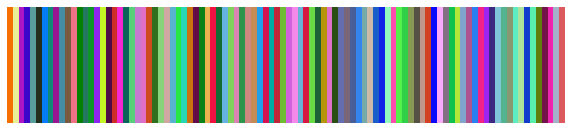

^Evaluation of unordered 100: 62.28133261068915
 Evaluation of unordered 100: 62.2813

Generating hill climb 100 solution...


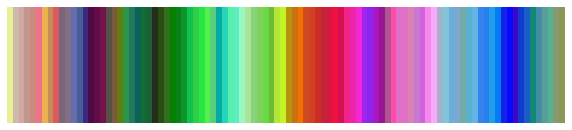

^Evaluation of order hc 100: 17.283121651271177
 Evaluation of order hc 100: 17.2831

Generating multi hill climb 100 solution...


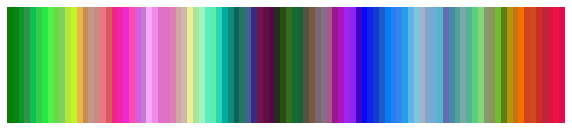

^Evaluation of order mhc 100: 16.54599117091713
 Evaluation of order mhc 100: 16.546

mhc_100: [12, 33, 14, 40, 76, 68, 29, 67, 52, 38, 77, 16, 34, 42, 71, 41, 11, 95, 81, 93, 19, 66, 48, 22, 74, 49, 23, 55, 39, 27, 62, 1, 88, 65, 87, 90, 30, 45, 7, 20, 13, 59, 83, 92, 32, 17, 5, 56, 25, 36, 53, 70, 10, 58, 75, 79, 8, 2, 82, 15, 3, 73, 64, 89, 63, 6, 80, 60, 43, 37, 84, 94, 78, 50, 28, 57, 9, 4, 61, 85, 21, 26, 86, 69, 47, 91, 54, 31, 0, 72, 24, 18, 46, 51, 35, 44]

Unordered solution 500...


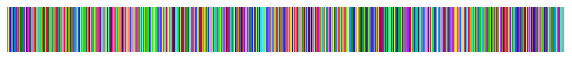

^Evaluation of unordered 500: 325.1667419062415
 Evaluation of unordered 500: 325.1667

Generating hill climb 500 solution...


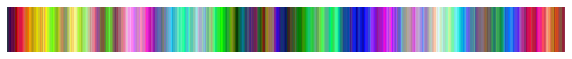

^Evaluation of order hc 500: 64.72343734778215
 Evaluation of order hc 500: 64.7234

Generating multi hill climb 500 solution...


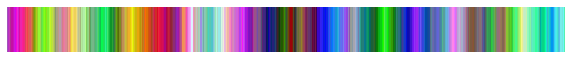

^Evaluation of order mhc 500: 65.71937296713429
 Evaluation of order mhc 500: 65.7194

mhc_500: [192, 396, 117, 197, 490, 276, 480, 478, 384, 19, 115, 286, 93, 103, 81, 411, 300, 257, 275, 248, 95, 482, 243, 400, 278, 201, 434, 317, 189, 415, 52, 321, 301, 122, 421, 429, 235, 219, 16, 77, 175, 113, 289, 86, 265, 71, 157, 181, 450, 446, 100, 401, 104, 41, 162, 299, 34, 302, 138, 404, 399, 344, 154, 350, 445, 142, 131, 88, 405, 283, 38, 26, 112, 69, 361, 178, 493, 135, 379, 259, 21, 342, 352, 76, 125, 188, 378, 110, 194, 256, 337, 348, 14, 96, 307, 177, 119, 414, 91, 389, 116, 282, 185, 42, 312, 170, 310, 412, 397, 288, 252, 290, 254, 237, 173, 328, 99, 205, 54, 473, 31, 98, 363, 0, 423, 294, 24, 72, 376, 444, 255, 51, 18, 358, 137, 35, 410, 245, 44, 442, 172, 332, 141, 46, 209, 388, 156, 471, 242, 333, 427, 491, 196, 370, 79, 443, 298, 108, 11, 66, 23, 49, 180, 74, 495, 250, 27, 62, 163, 293, 241, 409, 176, 390, 61, 140, 145, 149, 339, 198, 223, 475, 146, 84, 367, 169, 398, 273, 130, 48

In [30]:
ncolors100, colors100 = read_data("col100.txt")  # pass in 100 colour file to reading function
ncolors500, colors500 = read_data("col500.txt")  # pass in 500 colour file file to reading function

print(f'Number of colours 100: {ncolors100}')
print("First 5 colours of 100:")
print(colors100[0:5, :])  # prints rgb values for first five colours

# Plot all the colors in the order they are listed in the file
order100 = list(range(ncolors100))  # list of consecutive numbers from 0 to ncolors
print('\nUnordered solution 100...')
plot_colors(colors100, order100, 20)  # You will notice that colors are not ordered in the file
unordered_100_eval = evaluate(colors100, order100)
print(f'^Evaluation of unordered 100: {unordered_100_eval}')  # Displaying all decimals
print(f' Evaluation of unordered 100: {np.round(unordered_100_eval, 4)}')  # rounding to display only 4 decimals. This is better for display

print('\nGenerating hill climb 100 solution...')
hc_100, imp_trace100 = hill_climbing(20000, "inversion", colors100 ) # Run hill climb on 100. Include either "swap", "inversion" or "scramble"
plot_colors(colors100, hc_100, 20) #plot the colour ordering
hc_100_eval = evaluate(colors100, hc_100) # evaluate the solution
print(f'^Evaluation of order hc 100: {hc_100_eval}')  # Displaying all decimals
print(f' Evaluation of order hc 100: {np.round(hc_100_eval, 4)}')  # rounding to display only 4 decimals. This is better for display

print('\nGenerating multi hill climb 100 solution...')
mhc_100 = multi_hill_climbing(3, 20000, "inversion", colors100) # Run multi hill climb on 100. Include either "swap", "inversion" or "scramble"
plot_colors(colors100, mhc_100, 20)
mhc_100_eval = evaluate(colors100, mhc_100)# evaluate the solution
print(f'^Evaluation of order mhc 100: {mhc_100_eval}')  # Displaying all decimals
print(f' Evaluation of order mhc 100: {np.round(mhc_100_eval, 4)}')  # rounding to display only 4 decimals. This is better for display
print('\nmhc_100:', mhc_100)

mhc_best100 = [15, 82, 2, 8, 79, 75, 58, 10, 70, 5, 56, 53, 36, 20, 13, 7, 45, 30, 90, 87, 65, 84, 37, 28, 50, 78, 94, 22, 74, 49, 48, 23, 55, 39, 27, 71, 41, 11, 66, 19, 93, 81, 95, 42, 34, 1,
               62, 88, 26, 38, 77, 16, 52, 47, 69, 86, 61, 4, 85, 21, 67, 29, 68, 76, 40, 14, 33, 12, 25, 91, 54, 31, 0, 24, 72, 18, 51, 35, 44, 46, 92, 32, 17, 83, 59, 57, 9, 43, 60, 80, 6, 63, 89, 3, 64, 73]
                # 16.6013 eval, 3, 20000

#######################################################################################################################

order500 = list(range(ncolors500))  # list of consecutive numbers from 0 to ncolors
print('\nUnordered solution 500...')
plot_colors(colors500, order500, 40)  # You will notice that colors are not ordered in the file
unordered_500_eval = evaluate(colors500, order500)# evaluate the solution
print(f'^Evaluation of unordered 500: {unordered_500_eval}')  # Displaying all decimals
print(f' Evaluation of unordered 500: {np.round(unordered_500_eval, 4)}')  # rounding to display only 4 decimals. This is better for display

print('\nGenerating hill climb 500 solution...')
hc_500, imp_trace500 = hill_climbing(100000, "inversion", colors500 ) # Include either "swap", "inversion" or "scramble"
plot_colors(colors500, hc_500, 40)
hc_500_eval = evaluate(colors500, hc_500)# evaluate the solution
print(f'^Evaluation of order hc 500: {hc_500_eval}')  # Displaying all decimals
print(f' Evaluation of order hc 500: {np.round(hc_500_eval, 4)}')  # rounding to display only 4 decimals. This is better for display

print('\nGenerating multi hill climb 500 solution...')
mhc_500 = multi_hill_climbing(3, 100000, "inversion", colors500) # Include either "swap", "inversion" or "scramble"
plot_colors(colors500, mhc_500, 40)
mhc_500_eval= evaluate(colors500, mhc_500)# evaluate the solution
print(f'^Evaluation of order mhc 500: {mhc_500_eval}')  # Displaying all decimals
print(f' Evaluation of order mhc 500: {np.round(mhc_500_eval, 4)}')  # rounding to display only 4 decimals. This is better for display
print('\nmhc_500:', mhc_500)

mhc_best500 = [35, 245, 410, 51, 141, 209, 46, 255, 444, 18, 363, 243, 98, 400, 470, 70, 177, 458, 277, 123, 40, 487, 96, 349, 119, 424, 415, 228, 238, 21, 340, 267, 256, 261, 375, 110, 352, 76, 307, 200, 284, 161, 419, 63, 362, 346, 215, 9, 313, 121,
               133, 353, 75, 249, 139, 489, 418, 79, 164, 406, 426, 197, 370, 213, 306, 457, 58, 297, 433, 345, 231, 439, 334, 479, 336, 147, 206, 183, 264, 17, 392, 148, 102, 270, 208, 319, 365, 20, 53, 155, 36, 171, 25, 462, 258, 338, 343, 453, 220, 
               56, 430, 5, 357, 33, 12, 314, 291, 222, 91, 389, 416, 435, 376, 294, 24, 72, 248, 300, 95, 42, 170, 34, 298, 108, 11, 443, 482, 31, 0, 423, 54, 205, 473, 310, 99, 412, 397, 399, 154, 445, 350, 142, 265, 417, 26, 112, 182, 221, 229, 88, 
               143, 405, 202, 359, 303, 495, 311, 382, 461, 106, 330, 180, 74, 49, 372, 285, 463, 199, 355, 233, 438, 425, 144, 117, 402, 55, 23, 48, 22, 387, 381, 214, 269, 226, 385, 212, 309, 465, 472, 151, 232, 127, 101, 292, 134, 327, 230, 218, 266, 
               89, 179, 274, 380, 59, 324, 287, 477, 466, 253, 224, 347, 441, 315, 203, 64, 73, 452, 109, 407, 126, 3, 153, 468, 308, 246, 331, 136, 391, 326, 371, 168, 6, 403, 354, 60, 80, 486, 305, 422, 43, 114, 459, 383, 451, 28, 50, 191, 176, 366, 236,
               369, 4, 86, 483, 186, 94, 163, 409, 241, 62, 293, 494, 181, 157, 27, 162, 299, 104, 446, 41, 71, 271, 450, 192, 204, 427, 333, 196, 490, 286, 103, 93, 115, 276, 480, 478, 384, 251, 19, 66, 81, 411, 257, 275, 137, 358, 44, 442, 172, 242, 8, 
               491, 2, 396, 469, 193, 323, 394, 356, 247, 82, 15, 318, 211, 454, 447, 320, 240, 207, 160, 295, 57, 244, 263, 210, 7, 393, 216, 316, 485, 13, 341, 456, 374, 83, 167, 351, 92, 32, 268, 460, 195, 332, 388, 156, 471, 239, 105, 217, 325, 329, 467, 
               190, 455, 440, 116, 278, 414, 484, 262, 159, 449, 165, 420, 428, 174, 322, 14, 348, 152, 68, 360, 124, 432, 476, 47, 38, 52, 201, 429, 317, 122, 421, 301, 321, 235, 189, 219, 16, 175, 77, 434, 173, 328, 237, 252, 254, 288, 290, 302, 138, 404,
               344, 437, 1, 283, 131, 377, 113, 289, 312, 185, 474, 282, 368, 464, 187, 158, 10, 436,  234, 395, 69, 304, 431, 361, 379, 259, 335, 337, 29, 378, 188, 342, 67, 132, 129, 125, 194, 281, 272, 364, 45, 413, 97, 30, 386, 90, 118, 296, 279, 145, 37, 
               84, 390, 140, 149, 493, 178, 135, 85, 61, 373, 78, 339, 223, 475, 280, 184, 225, 150, 227, 492, 198, 146, 408, 87, 448, 120, 107, 130, 398, 488, 169, 65, 481, 367, 273, 128, 166, 250, 111, 401, 100, 260, 39]

## Output

### Plotting single run hill climb traces for 100 and 500 files

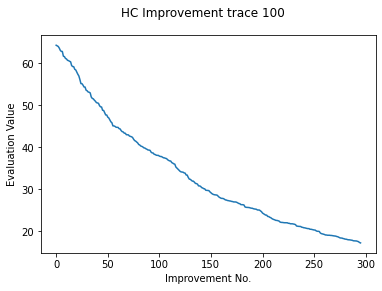

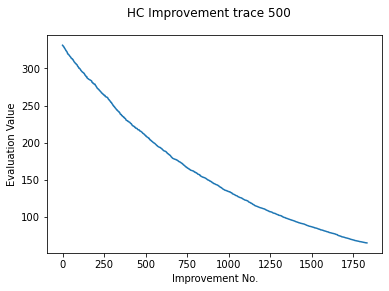

In [31]:
# plot the trace of one run of hillclimb for each file
plt.figure()
plt.suptitle('HC Improvement trace 100')
plt.plot(imp_trace100)
plt.ylabel("Evaluation Value")
plt.xlabel("Improvement No.")
plt.show()

plt.figure()
plt.suptitle('HC Improvement trace 500')
plt.plot(imp_trace500)
plt.ylabel("Evaluation Value")
plt.xlabel("Improvement No.")
plt.show()

Generating mutation method/iteration results  96  ...


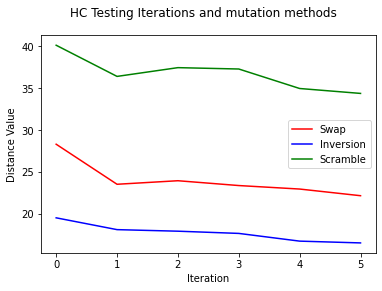

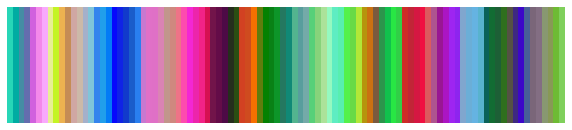

^best swap 96: 22.134100469259685


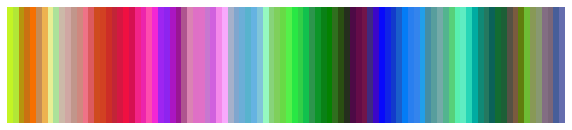

^best inversion 96: 16.4844986767521



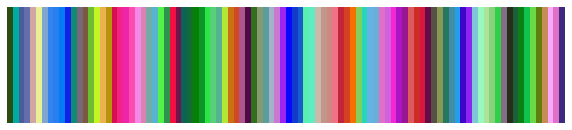

^best scramble solution 96: 34.37597196408388

Generating mutation method/iteration results  496  ...


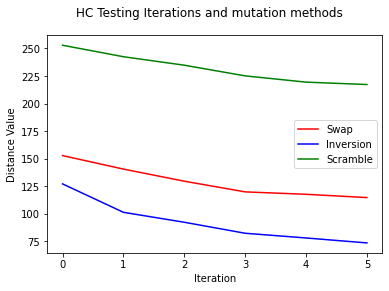

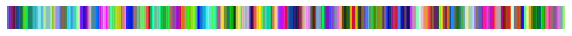

^best swap 496: 114.65438167443007


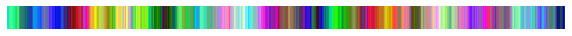

^best inversion 496: 73.47303122222512



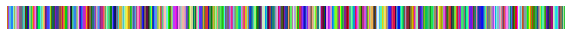

^best scramble solution 496: 217.25843758785714



In [32]:
evaluate_best_method(colors100, ncolors100, 5000) # TAKES ABOUT AN HOUR TO RUN. run method to evaluate best method
evaluate_best_method(colors500, ncolors500, 10000) # TAKES ABOUT AN 2 HOURS TO RUN. run method to evaluate best method

#### Below, the x axis refers to the number of iterations for example if the increment was 5000... 1 is 5000, 2 is 10,000, 3 is 15,000 etc

## Method and Iteration evaluation results

The conclusion reached by calling the evaluate_best_method function below is that for 100 colour array, inversion evaluation is rather consistently better than the other two methods, Around 5 better than swap and 15-20 better than scramble, for 500 colours inversion is roughly 40 better than swap and 160 better than scramble.  Also the more itereations for hc the better as this allows more opportunity for improvement by trying more orderings. 

#### A rough example (read off graph to nearest whole number) of the evaluation results can be show in the table below using 500 colours, 10,000 to 60,000 iterations in 10,000 increments. 

| Iterations | Swap | Inversion | Scramble |
| --- | --- | --- | --- |
| 0 | 325 | 325 | 325 |
| 10,000 | 157 | 126 | 257 |
| 20,000 | 141 | 107 | 240 |
| 30,000 | 137 | 92 | 231 |
| 40,000 | 129 | 85 | 223 |
| 50,000 | 118 | 79 | 220 |
| 60,000 | 117 | 74 | 217 |

As can be shown by the plot above, the more iterations the better the evaluation but as time goes on the improvement becomes less dramatic and begins to level out. 

Out of interest, if time was of no concern, we can see below what kind of results could be produced using 1 million hill climbing iterations. This takes a long  time so is not practical for real use. 


Generating hill climb 500 solution 1 million iterations...


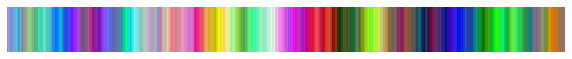


hc_500: [366, 176, 191, 326, 373, 78, 50, 37, 451, 28, 369, 4, 61, 244, 186, 483, 417, 265, 142, 112, 26, 149, 493, 178, 135, 85, 259, 335, 386, 198, 223, 339, 279, 87, 492, 408, 146, 475, 280, 422, 60, 80, 354, 403, 6, 486, 43, 114, 383, 305, 168, 266, 109, 452, 136, 134, 230, 327, 318, 15, 82, 247, 193, 192, 204, 164, 240, 213, 306, 297, 457, 406, 79, 426, 197, 370, 8, 333, 196, 427, 447, 320, 454, 211, 356, 323, 394, 127, 232, 371, 236, 391, 292, 101, 207, 295, 57, 160, 263, 313, 9, 210, 45, 272, 364, 281, 413, 30, 184, 459, 225, 150, 227, 448, 120, 107, 367, 84, 390, 140, 145, 241, 409, 163, 309, 212, 385, 465, 157, 181, 494, 94, 226, 269, 381, 214, 271, 450, 27, 350, 293, 62, 461, 106, 162, 299, 11, 100, 401, 446, 41, 71, 104, 39, 111, 250, 166, 260, 151, 472, 387, 22, 402, 55, 23, 66, 93, 286, 103, 81, 411, 443, 95, 248, 482, 108, 298, 34, 397, 412, 310, 170, 237, 328, 173, 99, 288, 254, 290, 252, 302, 138, 399, 404, 344, 437, 1, 143, 405, 88, 131, 283, 221, 182, 415, 38, 424, 4

In [33]:
print('\nGenerating hill climb 500 solution 1 million iterations...')
hc_mill500, m_trace = hill_climbing(1000000, "inversion", colors500) # run hill climb for 1 million iterations to demo very good solution
plot_colors(colors500, hc_mill500, 40)
print('\nhc_500:', hc_mill500)
hc_500_eval= evaluate(colors500, hc_mill500)# evaluate the solution
print(f'^Evaluation of order hc 500: {hc_500_eval}')  # Displaying all decimals
print(f' Evaluation of order hc 500: {np.round(hc_500_eval, 4)}')  # rounding to display only 4 decimals. This is better for display